In [ ]:
# Initial imports
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import sklearn.linear_model

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

stations = ('/content/TRNSFRM_ev_stations_v1.csv')
ny_registrations = ('/content/ny_ev_registrations_public.csv')
ny_zips = ('/content/NY_ZIPCODES.csv')
stations_df = pd.read_csv(stations)
nyreg_df = pd.read_csv(ny_registrations)
nyzips_df = pd.read_csv(ny_zips)

In [ ]:
stations_df.head()

,Station_Name,Street_Address,City,State_Code,Zip_Code,Status_Code,Access_Days_Time,EV_Level1_EVSE_Num,EV_Level2_EVSE_Num,EV_DC_Fast_Count,EV_Network,Latitude,Longitude,EV_ID,Owner_Type_Code,Open_Date,Access_Code,Facility_Type,Charging_Cost
0,LADWP - Truesdale Center,11797 Truesdale St,Sun Valley,CA,91352,E,Fleet use only,NaN,39.0,3.0,Non-Networked,34.248319,-118.387971,1517,LG,10/15/1999,private,UTILITY,NaN
1,LADWP - West LA District Office,1394 S Sepulveda Blvd,Los Angeles,CA,90024,E,NaN,NaN,4.0,NaN,Non-Networked,34.052542,-118.448504,1519,LG,2/28/2020,private,UTILITY,Free
2,Los Angeles Convention Center,1201 S Figueroa St,Los Angeles,CA,90015,E,24 hours daily; pay lot,NaN,12.0,NaN,Non-Networked,34.040539,-118.271387,1523,P,8/30/1995,public,PARKING_GARAGE,NaN
3,LADWP - John Ferraro Building,111 N Hope St,Los Angeles,CA,90012,E,For fleet and employee use only,NaN,311.0,2.0,Non-Networked,34.059133,-118.248589,1525,LG,10/15/1999,private,UTILITY,NaN
4,LADWP - Haynes Power Plant,6801 E 2nd St,Long Beach,CA,90803,E,Fleet use only,NaN,19.0,1.0,Non-Networked,33.759802,-118.096665,1531,LG,5/1/2018,private,UTILITY,NaN


In [ ]:
ny_stations_df = stations_df[stations_df['State_Code'] == 'NY']
ny_stations_df.head()

,Station_Name,Street_Address,City,State_Code,Zip_Code,Status_Code,Access_Days_Time,EV_Level1_EVSE_Num,EV_Level2_EVSE_Num,EV_DC_Fast_Count,EV_Network,Latitude,Longitude,EV_ID,Owner_Type_Code,Open_Date,Access_Code,Facility_Type,Charging_Cost
130,New York Institute of Technology - Old Westbur...,Valentines Ln & Northern Blvd,Old Westbury,NY,11568,E,NaN,4.0,NaN,NaN,Non-Networked,40.814019,-73.608978,35272,P,11/15/2009,private,COLLEGE_CAMPUS,NaN
138,New York State Energy Research Development Aut...,17 Columbia Cir,Albany,NY,12203,E,Employee and guest use only,1.0,5.0,NaN,Non-Networked,42.702424,-73.857693,35562,P,7/1/2008,private,STATE_GOV,NaN
139,Saratoga Technology & Energy Park,10 Hermes Rd,Malta,NY,12020,E,Employee and guest use only,2.0,NaN,NaN,Non-Networked,42.969823,-73.773021,35563,SG,7/1/2008,private,RESEARCH_FACILITY,NaN
140,Central Hudson Gas & Electric,284 South Ave,Poughkeepsie,NY,12601,E,NaN,1.0,NaN,NaN,Non-Networked,41.688323,-73.934330,35564,T,10/1/2009,private,UTILITY,NaN
153,Hudson Valley Community College - TEC-SMART Bu...,345 Hermes Rd,Malta,NY,12020,E,7am-10pm M-Sat,1.0,NaN,NaN,Non-Networked,42.971670,-73.774182,36532,SG,10/15/2010,public,COLLEGE_CAMPUS,Free


In [ ]:
nyzips_df

,ZIP_CODE
0,10001
1,10002
2,10003
3,10004
4,10005
...,...
2535,14902
2536,14903
2537,14904
2538,14905


In [ ]:
ny_station_counts_df = ny_stations_df.Zip_Code.value_counts().rename_axis('ZIP_CODE').reset_index(name='CHARGER_COUNTS')
ny_station_counts_df

,ZIP_CODE,CHARGER_COUNTS
0,12866,72
1,12205,41
2,12065,40
3,14203,36
4,12110,34
...,...,...
666,14837,1
667,14040,1
668,11935,1
669,13041,1


In [ ]:
for row in ny_station_counts_df.iterrows():
  ny_station_counts_df['STATION_INSTALLED'] = 1

ny_station_counts_df

,ZIP_CODE,CHARGER_COUNTS,STATION_INSTALLED
0,12866,72,1
1,12205,41,1
2,12065,40,1
3,14203,36,1
4,12110,34,1
...,...,...,...
666,14837,1,1
667,14040,1,1
668,11935,1,1
669,13041,1,1


In [ ]:
nyreg_df

,DMV_ID,DMV_Snapshot_Date,Zip_code,VIN_Prefix,Registration_Valid_Date,State,EV_Make_Model
0,38,NY DATA.NY.GOV (3/2/2020),12307,KMHC65LD,1/18/2020,NY,Hyundai Ioniq Plug In
1,38,NY DATA.NY.GOV (3/2/2020),14108,KMHC65LD,1/6/2020,NY,Hyundai Ioniq Plug In
2,38,NY DATA.NY.GOV (3/2/2020),14221,KMHC65LD,1/14/2020,NY,Hyundai Ioniq Plug In
3,38,NY DATA.NY.GOV (3/2/2020),12149,KMHC65LD,2/20/2020,NY,Hyundai Ioniq Plug In
4,38,NY DATA.NY.GOV (3/2/2020),14227,KMHC65LD,1/28/2020,NY,Hyundai Ioniq Plug In
...,...,...,...,...,...,...,...
1048570,15,NY DATA.NY.GOV (1/02/2018),13502,JTDKARFP,10/21/2017,NY,Toyota Prius Prime
1048571,15,NY DATA.NY.GOV (1/02/2018),14304,JTDKARFP,12/16/2017,NY,Toyota Prius Prime
1048572,15,NY DATA.NY.GOV (1/02/2018),10019,JTDKARFP,11/1/2017,NY,Toyota Prius Prime
1048573,15,NY DATA.NY.GOV (1/02/2018),13630,JTDKARFP,11/30/2017,NY,Toyota Prius Prime


In [ ]:
ny_reg_counts_df = nyreg_df.Zip_code.value_counts().rename_axis('ZIP_CODE').reset_index(name='REGISTRATION_COUNTS')
ny_reg_counts_df

,ZIP_CODE,REGISTRATION_COUNTS
0,10583,11724
1,11746,11722
2,14850,9554
3,11791,8147
4,11743,7872
...,...,...
2395,3049,1
2396,49509,1
2397,12169,1
2398,7648,1


In [ ]:
nyzips_df['ZIP_CODE'] = nyzips_df["ZIP_CODE"].astype(int).astype(str)
nyzips_df.dtypes

ZIP_CODE    object
dtype: object

In [ ]:
ny_station_counts_df.dtypes

ZIP_CODE             object
CHARGER_COUNTS        int64
STATION_INSTALLED     int64
dtype: object

In [ ]:
ny_reg_counts_df.dtypes

ZIP_CODE               int64
REGISTRATION_COUNTS    int64
dtype: object

In [ ]:
ny_reg_counts_df['ZIP_CODE'] = ny_reg_counts_df['ZIP_CODE'].astype(int).astype(str)
ny_reg_counts_df.dtypes

ZIP_CODE               object
REGISTRATION_COUNTS     int64
dtype: object

In [ ]:
ny_ev_df = nyzips_df.merge(ny_station_counts_df, how='left', on="ZIP_CODE")
ny_ev_df

,ZIP_CODE,CHARGER_COUNTS,STATION_INSTALLED
0,10001,11.0,1.0
1,10002,6.0,1.0
2,10003,16.0,1.0
3,10004,1.0,1.0
4,10005,3.0,1.0
...,...,...,...
2535,14902,NaN,NaN
2536,14903,NaN,NaN
2537,14904,NaN,NaN
2538,14905,1.0,1.0


In [ ]:
ny_ev_df = ny_ev_df.merge(ny_reg_counts_df, how='left', on="ZIP_CODE")
ny_ev_df

,ZIP_CODE,CHARGER_COUNTS,STATION_INSTALLED,REGISTRATION_COUNTS
0,10001,11.0,1.0,1127.0
1,10002,6.0,1.0,1161.0
2,10003,16.0,1.0,2370.0
3,10004,1.0,1.0,1605.0
4,10005,3.0,1.0,466.0
...,...,...,...,...
2535,14902,NaN,NaN,NaN
2536,14903,NaN,NaN,351.0
2537,14904,NaN,NaN,206.0
2538,14905,1.0,1.0,383.0


In [ ]:
ny_ev_df = ny_ev_df[['ZIP_CODE', 'CHARGER_COUNTS', 'REGISTRATION_COUNTS', 'STATION_INSTALLED']]
ny_ev_df

,ZIP_CODE,CHARGER_COUNTS,REGISTRATION_COUNTS,STATION_INSTALLED
0,10001,11.0,1127.0,1.0
1,10002,6.0,1161.0,1.0
2,10003,16.0,2370.0,1.0
3,10004,1.0,1605.0,1.0
4,10005,3.0,466.0,1.0
...,...,...,...,...
2535,14902,NaN,NaN,NaN
2536,14903,NaN,351.0,NaN
2537,14904,NaN,206.0,NaN
2538,14905,1.0,383.0,1.0


In [ ]:
ny_ev_df.dtypes

ZIP_CODE                object
CHARGER_COUNTS         float64
REGISTRATION_COUNTS    float64
STATION_INSTALLED      float64
dtype: object

In [ ]:
ny_ev_df['ZIP_CODE'] = ny_ev_df['ZIP_CODE'].astype(str).astype(int)
ny_ev_df.dtypes

ZIP_CODE                 int64
CHARGER_COUNTS         float64
REGISTRATION_COUNTS    float64
STATION_INSTALLED      float64
dtype: object

In [ ]:
ny_ev_df = ny_ev_df[ny_ev_df['ZIP_CODE'] <= 14975]
ny_ev_df

,ZIP_CODE,CHARGER_COUNTS,REGISTRATION_COUNTS,STATION_INSTALLED
0,10001,11.0,1127.0,1.0
1,10002,6.0,1161.0,1.0
2,10003,16.0,2370.0,1.0
3,10004,1.0,1605.0,1.0
4,10005,3.0,466.0,1.0
...,...,...,...,...
2535,14902,NaN,NaN,NaN
2536,14903,NaN,351.0,NaN
2537,14904,NaN,206.0,NaN
2538,14905,1.0,383.0,1.0


In [ ]:
ny_ev_df = ny_ev_df[ny_ev_df['ZIP_CODE'] >= 10001]
ny_ev_df

,ZIP_CODE,CHARGER_COUNTS,REGISTRATION_COUNTS,STATION_INSTALLED
0,10001,11.0,1127.0,1.0
1,10002,6.0,1161.0,1.0
2,10003,16.0,2370.0,1.0
3,10004,1.0,1605.0,1.0
4,10005,3.0,466.0,1.0
...,...,...,...,...
2535,14902,NaN,NaN,NaN
2536,14903,NaN,351.0,NaN
2537,14904,NaN,206.0,NaN
2538,14905,1.0,383.0,1.0


In [ ]:
ny_ev_df['STATION_INSTALLED'] = ny_ev_df['STATION_INSTALLED'].fillna(0)
ny_ev_df['CHARGER_COUNTS'] = ny_ev_df['CHARGER_COUNTS'].fillna(0)
ny_ev_df['REGISTRATION_COUNTS'] = ny_ev_df['REGISTRATION_COUNTS'].fillna(0)
ny_ev_df

,ZIP_CODE,CHARGER_COUNTS,REGISTRATION_COUNTS,STATION_INSTALLED
0,10001,11.0,1127.0,1.0
1,10002,6.0,1161.0,1.0
2,10003,16.0,2370.0,1.0
3,10004,1.0,1605.0,1.0
4,10005,3.0,466.0,1.0
...,...,...,...,...
2535,14902,0.0,0.0,0.0
2536,14903,0.0,351.0,0.0
2537,14904,0.0,206.0,0.0
2538,14905,1.0,383.0,1.0


In [ ]:
ny_ev_df = ny_ev_df.dropna()
ny_ev_df

,ZIP_CODE,CHARGER_COUNTS,REGISTRATION_COUNTS,STATION_INSTALLED
0,10001,11.0,1127.0,1.0
1,10002,6.0,1161.0,1.0
2,10003,16.0,2370.0,1.0
3,10004,1.0,1605.0,1.0
4,10005,3.0,466.0,1.0
...,...,...,...,...
2535,14902,0.0,0.0,0.0
2536,14903,0.0,351.0,0.0
2537,14904,0.0,206.0,0.0
2538,14905,1.0,383.0,1.0


In [ ]:
ny_ev_df['CHARGER_COUNTS'] = ny_ev_df['CHARGER_COUNTS'].astype(int)
ny_ev_df['REGISTRATION_COUNTS'] = ny_ev_df['REGISTRATION_COUNTS'].astype(int)
ny_ev_df['STATION_INSTALLED'] = ny_ev_df['STATION_INSTALLED'].astype(int)
ny_ev_df

,ZIP_CODE,CHARGER_COUNTS,REGISTRATION_COUNTS,STATION_INSTALLED
0,10001,11,1127,1
1,10002,6,1161,1
2,10003,16,2370,1
3,10004,1,1605,1
4,10005,3,466,1
...,...,...,...,...
2535,14902,0,0,0
2536,14903,0,351,0
2537,14904,0,206,0
2538,14905,1,383,1


In [ ]:
ny_ev_df.index = ny_ev_df['ZIP_CODE']
ny_ev_df = ny_ev_df.drop(columns=['ZIP_CODE'])
ny_ev_df

,CHARGER_COUNTS,REGISTRATION_COUNTS,STATION_INSTALLED
ZIP_CODE,,,
10001,11,1127,1
10002,6,1161,1
10003,16,2370,1
10004,1,1605,1
10005,3,466,1
...,...,...,...
14902,0,0,0
14903,0,351,0
14904,0,206,0


In [ ]:
ny_ev_df.describe()

,CHARGER_COUNTS,REGISTRATION_COUNTS,STATION_INSTALLED
count,2540.000000,2540.000000,2540.000000
mean,1.348031,474.772047,0.311811
std,3.944192,984.320464,0.463324
min,0.000000,0.000000,0.000000
25%,0.000000,11.000000,0.000000
50%,0.000000,82.000000,0.000000
75%,1.000000,439.000000,1.000000
max,72.000000,11724.000000,1.000000


# Linear Regression

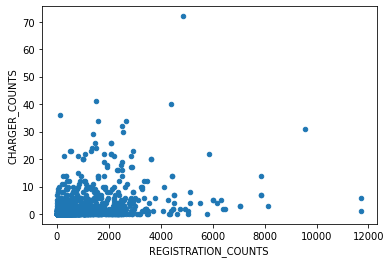

In [ ]:
ny_ev_df.plot(
    kind='scatter',
    x='REGISTRATION_COUNTS',
    y='CHARGER_COUNTS'
    )
plt.show()

In [ ]:
#X = np.c_[ny_ev_df['REGISTRATION_COUNTS']]
#y = np.c_[ny_ev_df['CHARGER_COUNTS']]
X = ny_ev_df.REGISTRATION_COUNTS.values.reshape(-1, 1)
X.shape

(2540, 1)

In [ ]:
y = ny_ev_df.CHARGER_COUNTS

In [ ]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [ ]:
X_new = [[250]]
print(model.predict(X_new))

[0.96363991]


In [ ]:
# k-Nearest Neighbor
import sklearn.neighbors
neighbor_model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)
neighbor_model.fit(X,y)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
X_neig_new = [[250]]
print(neighbor_model.predict(X_neig_new))

[[1.33333333]]


In [ ]:
y_pred = model.predict(X)
print(y_pred.shape)

(2540,)


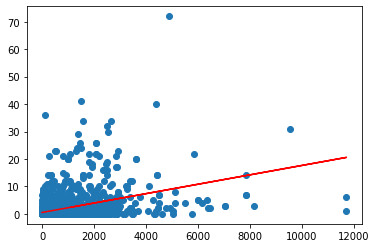

In [ ]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [ ]:
print(model.coef_)
print(model.intercept_)

[0.00171014]
0.5361050037061253
